In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('Telco_Cust_Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data = data.drop('customerID', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Need to change TotalCharges to correct data type 

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
# Check for null data after change

In [ ]:
data['TotalCharges'].isnull().mean()

0.001561834445548772

In [ ]:
# Null data minimal - to just be dropped
data = data.dropna()

In [ ]:
# Explore dataset further before splitting into categorical and numerical subsets

In [ ]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
# SeniorCitizen is a binary variable - to be added to categorical subset

In [ ]:
cat_data = data.select_dtypes(include='O')
cat_data['SeniorCitizen'] = data['SeniorCitizen']

num_data = data.select_dtypes(include=['int64','float64'])
num_data = num_data.drop('SeniorCitizen', axis=1)

cat_cols = cat_data.columns
num_cols = num_data.columns

In [ ]:
#######################
# Univariate analysis #

In [ ]:
## Numerical variable analysis

In [ ]:
def diagnostic_plots(df, variable, skewcheck=False):
  plt.figure(figsize=(16,4))

  plt.subplot(1,3,1)
  sns.histplot(df[variable], bins=30, kde=True)
  plt.title(f'Histogram - {variable}')

  if not skewcheck:
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')
    plt.title(f'Q-Q Plot - {variable}')

    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot - {variable}')

  plt.show()

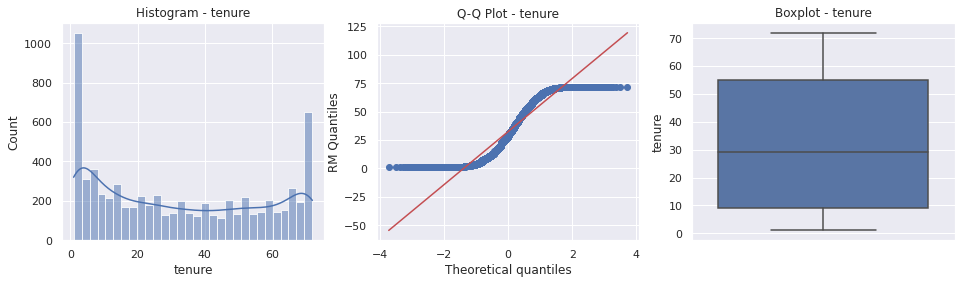

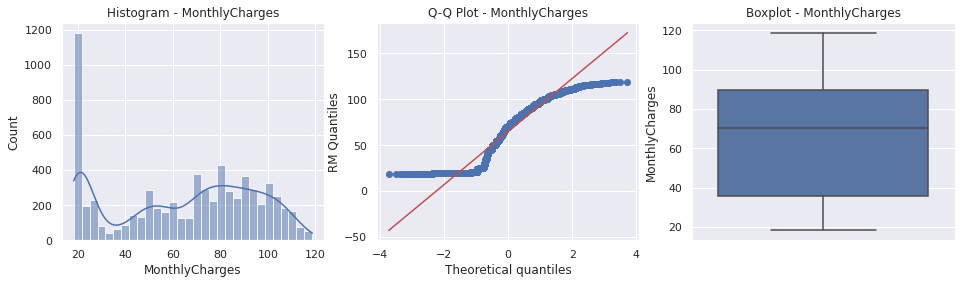

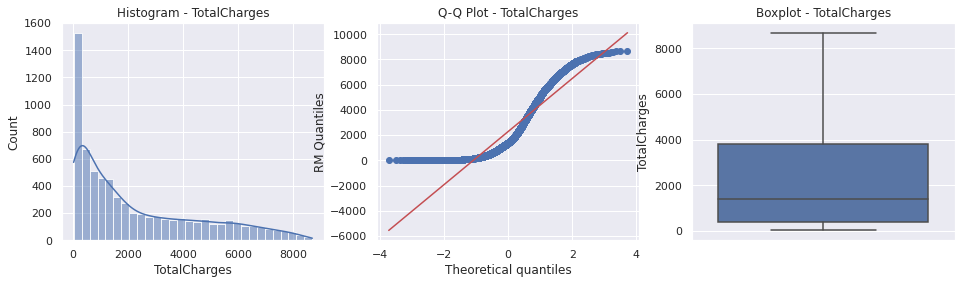

In [ ]:
for i in range(num_data.shape[1]):
  diagnostic_plots(num_data, num_cols[i])

In [ ]:
num_data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [ ]:
# No outliers detected
# Tenure dominated by shortest and longest periods of patronage
# Monthly charges domianted by lowest values suggesting significant subset of customers purchasing minimial services 
# 'TotalCharges' possesses significant skew - to log transform to try to correct 

In [ ]:
df = data.copy()
df['TotalCharges'] = np.log(data['TotalCharges'])
df['TotalCharges'].skew()

-0.7535741253284722

In [ ]:
# Log transformation unsuccessful (skewed data in opposite direction)
# To try with square root transformation 

In [ ]:
df['TotalCharges'] = np.sqrt(data['TotalCharges'])
df['TotalCharges'].skew()

0.3089261418986736

In [ ]:
# More satisfactory result - to check distribution with histogram

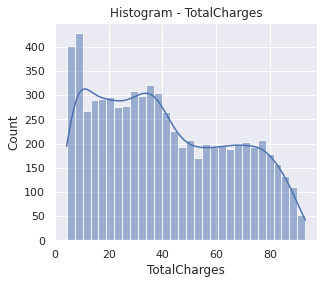

In [ ]:
diagnostic_plots(df, 'TotalCharges', True)

In [ ]:
## Categorical variable analysis

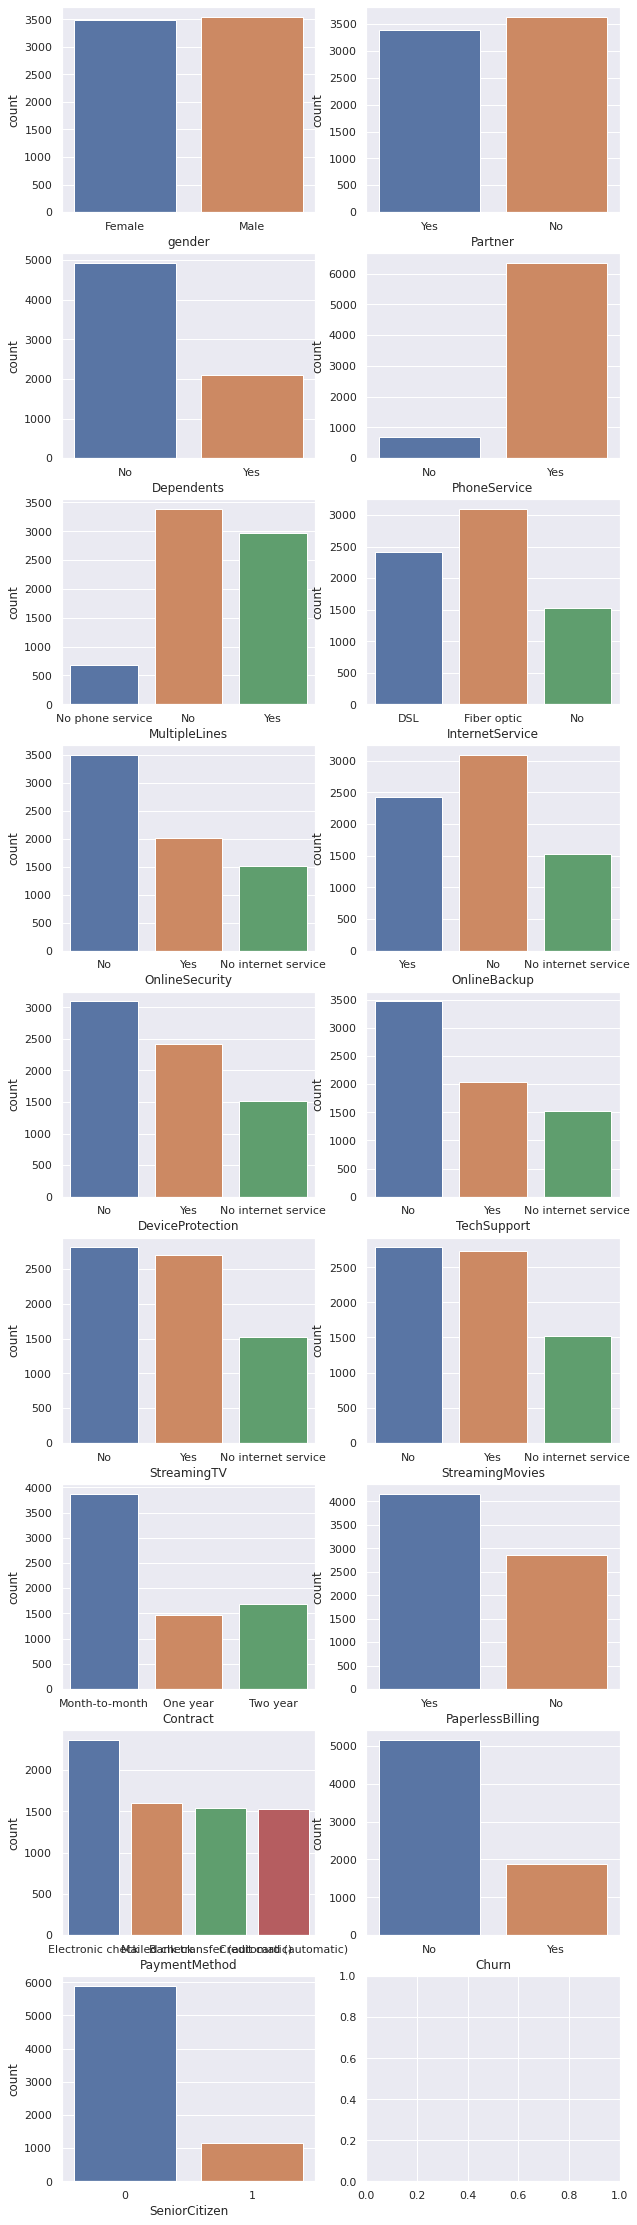

In [ ]:
n = len(cat_cols)

fig, ax = plt.subplots(math.ceil(n/2), 2, figsize=(10,40), sharey=False)
axes = ax.flatten()

for i in range(n):
  sns.countplot(data=cat_data, x=cat_cols[i], ax=axes[i])

In [ ]:
# Significantly more customers without dependents
# Vast majority of customers purchasing phone and Internet services 
# However, large proportion of customer base not purchasing additional services because of either active choice or lack of Internet service
# Slightly more customers on month-to-month contracts versus yearly and paperless billing.
# Electronic check most significant payment method
# Relatively small amount of senior citizens

In [ ]:
######################
# Bivariate analysis #

In [ ]:
## Stacked bar chart analysis of categorical data

In [ ]:
# To simplify data by combining 'No Internet service' with 'No' customers as both customer subsets not purchasing service

In [ ]:
cat_data_replaced = cat_data.replace('No internet service','No')

In [ ]:
def stacked_bars(df, var, ax):
  churn_data = df.groupby(var)['Churn_Yes'].agg(['count','sum']).reset_index()
  churn_data['Customer Churn (%)'] = churn_data['sum']/churn_data['count']*100
  churn_data['Total (%)'] = 100

  bar1 = sns.barplot(x=var, y='Total (%)', data=churn_data, color='lightgrey', alpha=0.4, ax=ax)
  bar2 = sns.barplot(x=var, y="Customer Churn (%)", data=churn_data, color='blue', ax=ax)

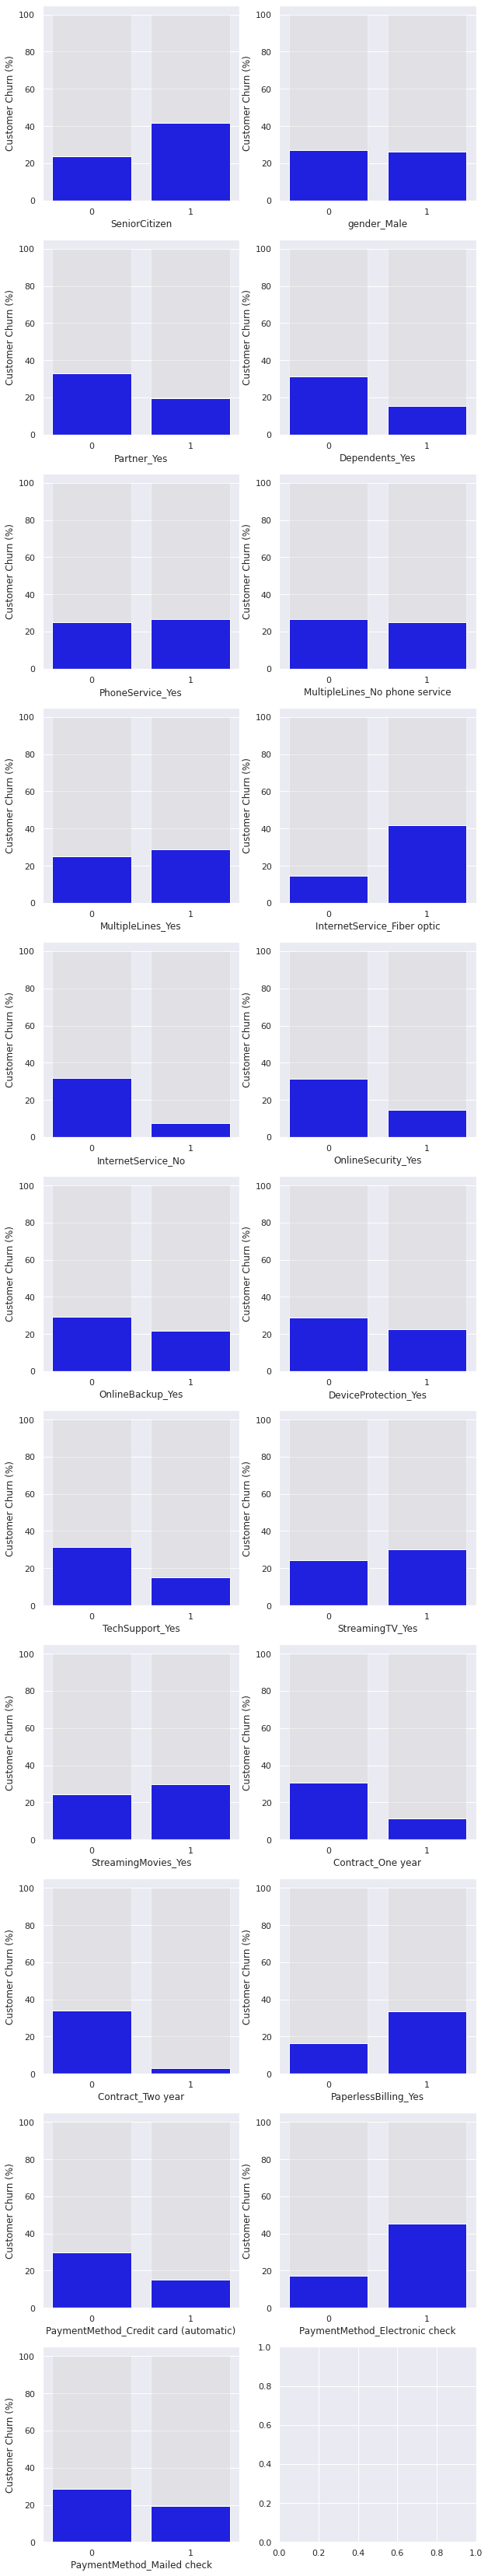

In [ ]:
cat_data_encoded = pd.get_dummies(cat_data_replaced, drop_first=True)
cat_cols_encoded = cat_data_encoded.columns

n = len(cat_cols_encoded)-1

fig, ax = plt.subplots(math.ceil(n/2), 2, figsize=(10, 60), sharey=False)
axes = ax.flatten()

for i in range(n):
  stacked_bars(cat_data_encoded, cat_cols_encoded[i], axes[i])

In [ ]:
### Bar charts indicate that increased churn may be associated with:
# Senior customers and those lacking dependents and a partner
# Those purchasing Internet service 
# Fibre optic Internet service, instead of DSL
# Those not purchasing online security, online backup or tech support
# Those without yearly contracts
# Those with paperless billing and an electronic check for payment method

In [ ]:
### Insights:
# Given large proportion of customers purchasing Internet service and the assoicated churn rates, the customer segment purchasing the ***fibre optic Internet service*** could be of particular significance. 
# Given significant proportion of customers have month-to-month contracts, low monthly charges, low tenure and limited service purchases it could relate to a more price sensitive/fickle customer segment. 
# Such a segment could be more prone to switching behaviour - worth exploring as causal factor in churn rates.
# In light of this, there could be issues with the product offering and/or related customer service that need to be addressed. 

In [ ]:
# To use correlation matrix to analyse pairwise correlations

In [ ]:
df_encoded = df.copy()
df_encoded = df_encoded.replace('No internet service','No')
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

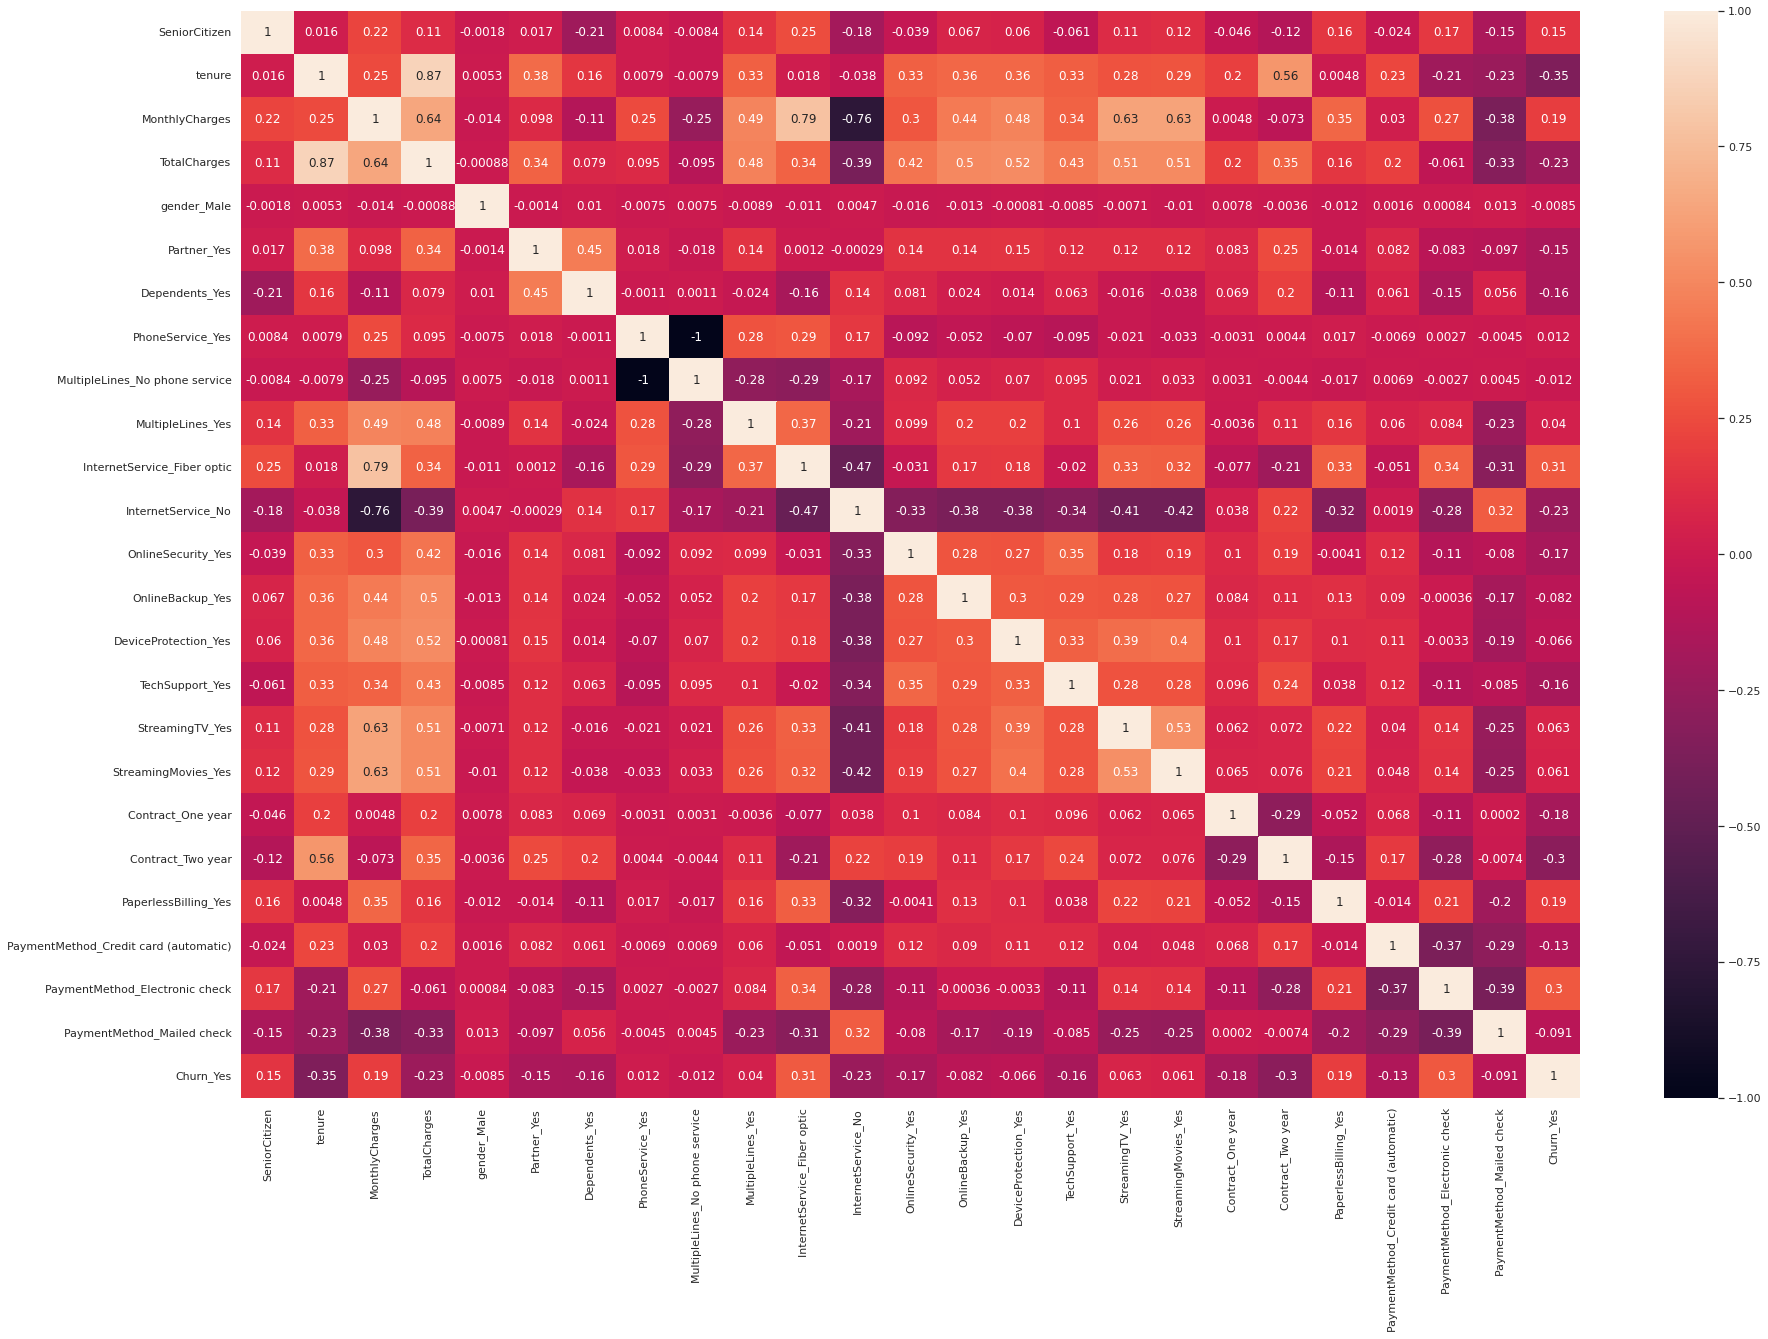

In [ ]:
fig = plt.figure(figsize=(30,20))
sns.heatmap(df_encoded.corr(), annot=True)

In [ ]:
# Due to levels of collinearity indicated, to investigate multicollinearity via VIF analysis

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
  VIF_Scores = pd.DataFrame()
  VIF_Scores["Independent Features"] = df.columns
  VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return VIF_Scores

vif(df_encoded)

,Independent Features,VIF Scores
0,SeniorCitizen,1.155458
1,tenure,16.266917
2,MonthlyCharges,866.281753
3,TotalCharges,24.549248
4,gender_Male,1.001994
5,Partner_Yes,1.464245
6,Dependents_Yes,1.381368
7,PhoneService_Yes,1763.962534
8,MultipleLines_No phone service,59.935283
9,MultipleLines_Yes,7.315269


In [ ]:
# High levels of multicollinearity (MC) indicated - to proceed with dropping select variables to improve model weight accuracy in logistic regression modelling

In [ ]:
df_dropped = df_encoded.drop(['PhoneService_Yes','MonthlyCharges','TotalCharges','tenure'], axis=1)

vif(df_dropped)

,Independent Features,VIF Scores
0,SeniorCitizen,1.367078
1,gender_Male,1.895620
2,Partner_Yes,2.688536
3,Dependents_Yes,1.946917
4,MultipleLines_No phone service,1.369599
5,MultipleLines_Yes,2.297730
6,InternetService_Fiber optic,3.264406
7,InternetService_No,2.497238
8,OnlineSecurity_Yes,1.853565
9,OnlineBackup_Yes,1.985912


In [ ]:
# Multicollinearity eased to more acceptable levels

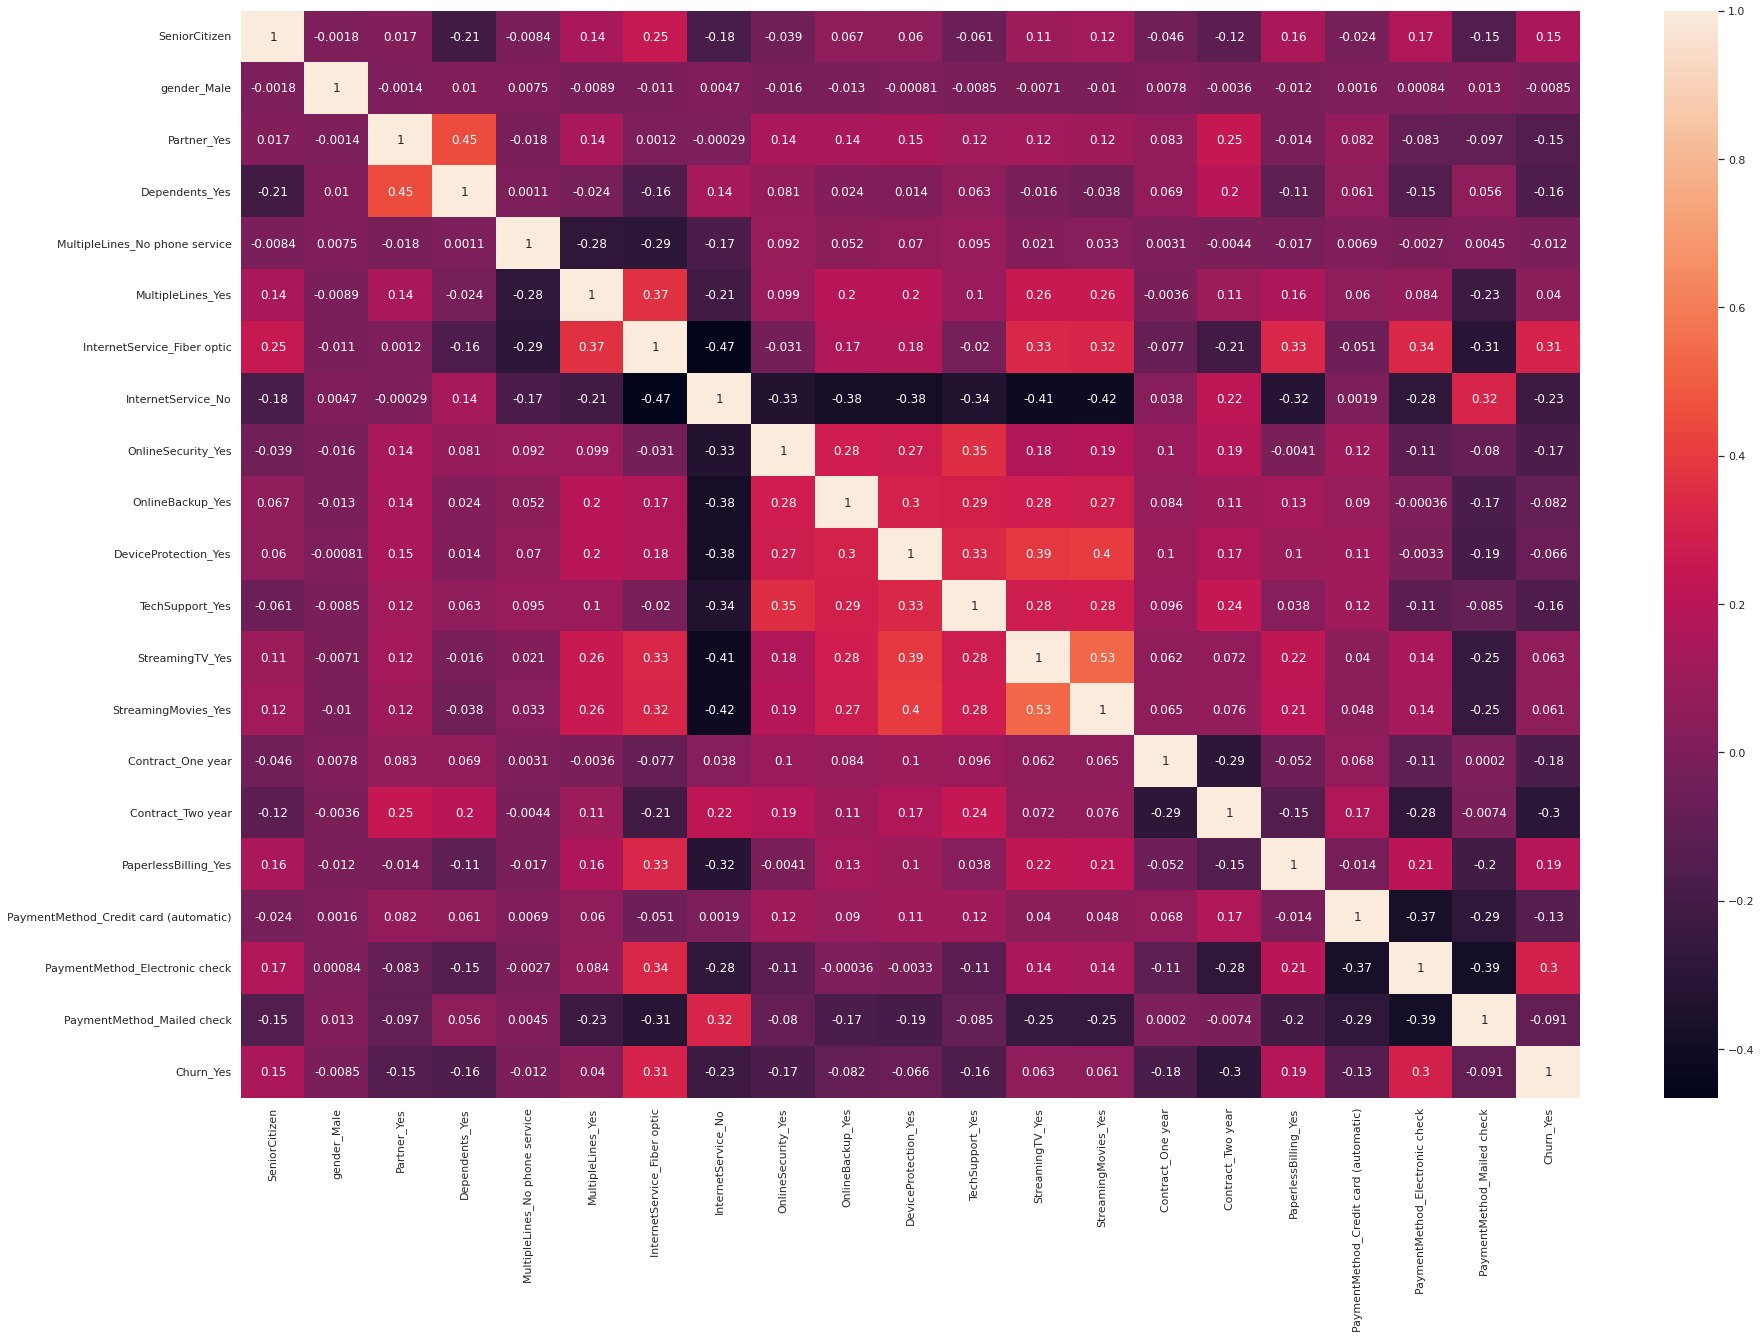

In [ ]:
fig = plt.figure(figsize=(30,20))
sns.heatmap(df_dropped.corr(), annot=True)

In [ ]:
# Check for imbalanced target variable

In [ ]:
df_dropped['Churn_Yes'].value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

In [ ]:
# Significant imbalance present - to apply SMOTE

In [ ]:
X = df_dropped.copy()
y = X.pop('Churn_Yes')

In [ ]:
# Standardise data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_scaled, y)

In [ ]:
###################################
## Logistic Regression Modelling ##

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [ ]:
lg_model.intercept_

array([-0.66742273])

In [ ]:
logistic_regession_coef = pd.DataFrame()
logistic_regession_coef['Variable'] = X_smote.columns
logistic_regession_coef['Weight'] = lg_model.coef_[0]
logistic_regession_coef['Odds ratio'] = np.exp(lg_model.coef_[0])
logistic_regession_coef.sort_values(by='Weight', ascending=False).reset_index(drop=True)

,Variable,Weight,Odds ratio
0,InternetService_Fiber optic,0.435086,1.545096
1,PaymentMethod_Electronic check,0.220071,1.246165
2,PaperlessBilling_Yes,0.173369,1.189305
3,StreamingTV_Yes,0.109323,1.115522
4,PaymentMethod_Mailed check,0.097307,1.102199
5,StreamingMovies_Yes,0.091846,1.096196
6,MultipleLines_No phone service,0.085830,1.089621
7,SeniorCitizen,0.027930,1.028324
8,MultipleLines_Yes,-0.018358,0.981810
9,PaymentMethod_Credit card (automatic),-0.025375,0.974945


In [ ]:
# As indicated during EDA, fibre optic Internet service has the most significant positive weighting with an odds ratio suggesting these customers are around 50% more likely to churn than those choosing alternative Internet service offerings when all other variables are held constant.
# Electronic check payment method and, in terms of negative correlations, customers with yearly contracts (particularly 2 years) have significant impacts on churn rates.   

In [ ]:
y_pred = lg_model.predict(X_smote)

print(f'Accuracy score: {accuracy_score(y_smote, y_pred)}')
print(f'Recall score: {recall_score(y_smote, y_pred)}')
print(f'Precision score: {precision_score(y_smote, y_pred)}')
print(f'F1 score: {f1_score(y_smote, y_pred)}')
print(f'Matthew\'s coeff: {matthews_corrcoef(y_smote, y_pred)}')

Accuracy score: 0.7665117179934147
Recall score: 0.8121247336819678
Precision score: 0.7442314518991835
F1 score: 0.7766972307122347
Matthew's coeff: 0.5352553372509696


In [ ]:
# To apply several models to data to assess relative performance

Model:  Random Forest
Accuracy score: 0.9355026147588611
Recall score: 0.9434437342630254
Precision score: 0.9286939942802669
F1 score: 0.936010760953113
Matthew's coeff: 0.8711151038863901


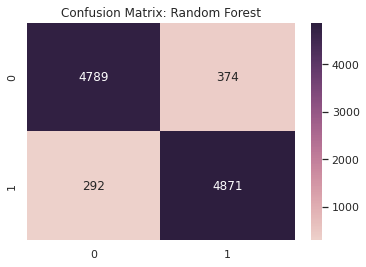

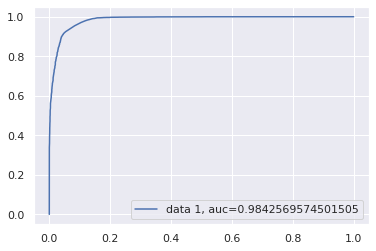

Model:  Support Vector Classifier
Accuracy score: 0.8359480921944605
Recall score: 0.8698431144683324
Precision score: 0.8146199891166334
F1 score: 0.8413263394529786
Matthew's coeff: 0.6734453720410126


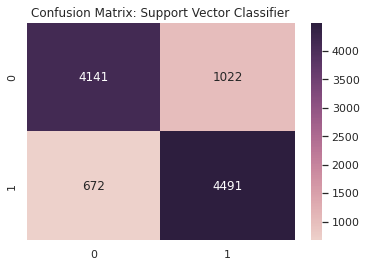

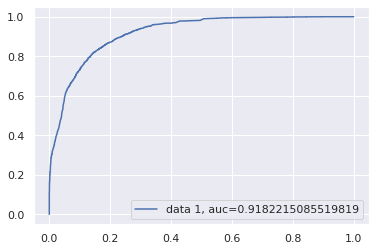

Model:  XG Boost
Accuracy score: 0.8348828200658532
Recall score: 0.8560914197172187
Precision score: 0.821256038647343
F1 score: 0.838311996206733
Matthew's coeff: 0.670368981876293


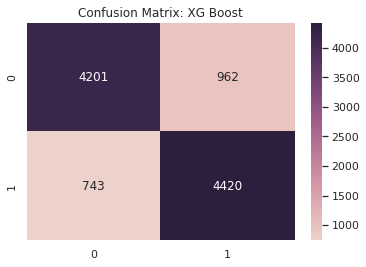

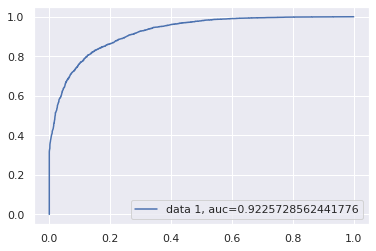

Model:  LGBM
Accuracy score: 0.862483052488863
Recall score: 0.8547356188262638
Precision score: 0.868188077906748
F1 score: 0.8614093304704276
Matthew's coeff: 0.7250531495391692


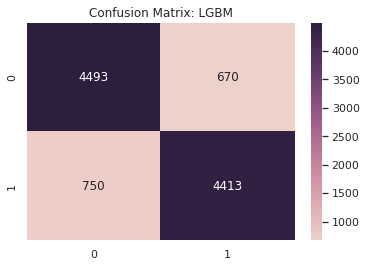

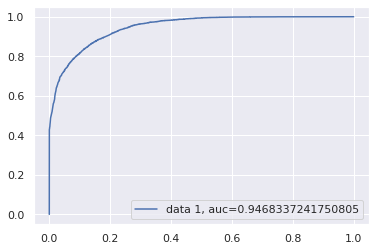

Model:  Cat Boost
Accuracy score: 0.8676157272903351
Recall score: 0.8609335657563432
Precision score: 0.8725952100510405
F1 score: 0.86672516330311
Matthew's coeff: 0.7352971214322829


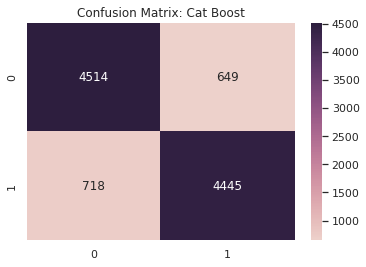

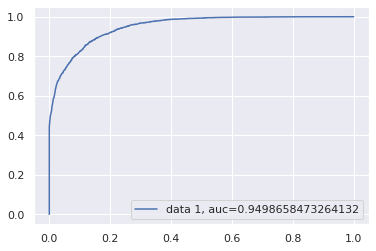

In [ ]:
models = [('Random Forest', RandomForestClassifier()),
          ('Support Vector Classifier', SVC(probability = True)),
          ('XG Boost', XGBClassifier()),
          ('LGBM', LGBMClassifier()),
          ('Cat Boost', CatBoostClassifier(logging_level = 'Silent'))]

for name, model in models:
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_smote)
    
    print("Model: ",name)
    print(f'Accuracy score: {accuracy_score(y_smote, y_pred)}')
    print(f'Recall score: {recall_score(y_smote, y_pred)}')
    print(f'Precision score: {precision_score(y_smote, y_pred)}')
    print(f'F1 score: {f1_score(y_smote, y_pred)}')
    print(f'Matthew\'s coeff: {matthews_corrcoef(y_smote, y_pred)}')

    plt.figure()
    cf_matrix = confusion_matrix(y_smote, y_pred)
    plt.title(f'Confusion Matrix: {name}')
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()

    y_pred_proba = model.predict_proba(X_smote)[::,1]
    fpr, tpr, _ = roc_curve(y_smote,  y_pred_proba)
    auc = roc_auc_score(y_smote, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [ ]:
# Random Forest Classifier seems to perform the best without tuning 

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_smote,y_smote)

RandomForestClassifier()

In [ ]:
pd.DataFrame({'Variable':X_smote.columns,'Importance':rfc_model.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Variable,Importance
0,Contract_Two year,0.105485
1,InternetService_Fiber optic,0.095850
2,Contract_One year,0.068359
3,PaymentMethod_Electronic check,0.062827
4,gender_Male,0.059383
5,PaperlessBilling_Yes,0.057546
6,Partner_Yes,0.054502
7,TechSupport_Yes,0.053290
8,OnlineSecurity_Yes,0.051579
9,OnlineBackup_Yes,0.047722


In [ ]:
# In agreement with the logistic regression weights, the most significant variables are: two and one year contracts, fiber optic Internet service and electronic check payment method.
# Results may warrant closer inspection of fiber optic offering and related customer service to improve churn rates. 